In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split


In [3]:
#MNIST hand written digits dataset

In [4]:
from sklearn import datasets

In [10]:
#dir(datasets)

In [7]:
from sklearn.datasets import load_digits
digits=load_digits()

In [8]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

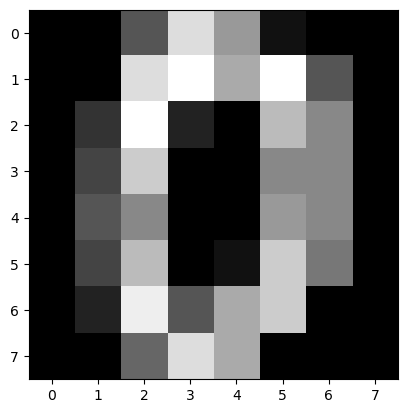

In [13]:
plt.imshow(digits.images[0],cmap=plt.cm.gray)

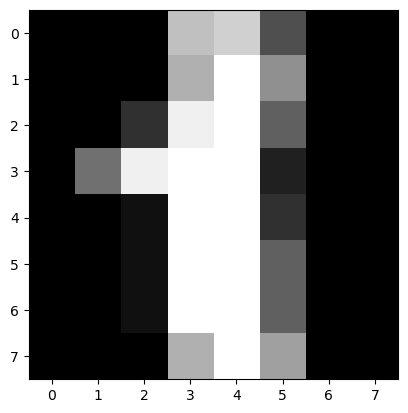

In [14]:
plt.imshow(digits.images[1],cmap=plt.cm.gray)

In [15]:
data1=pd.DataFrame(digits.data)

In [16]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [19]:
data1.shape

(1797, 64)

In [20]:
df = pd.DataFrame(data = digits.data, columns = digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [21]:
1797*64

115008

In [22]:
digits.images.shape

(1797, 8, 8)

In [23]:
digits.data[0:6]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [24]:
digits.target[0:6]

array([0, 1, 2, 3, 4, 5])

In [25]:
for i,j in enumerate(['el1','el2','el3']):
    print(i)
    print(j)

0
el1
1
el2
2
el3


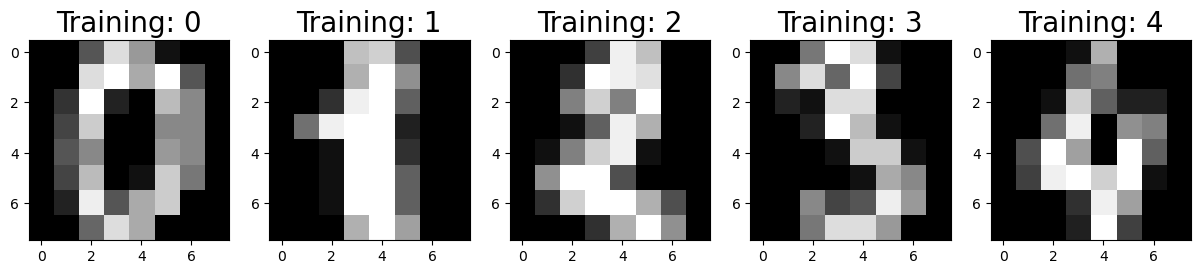

In [26]:
plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20 )  

In [30]:
x=digits.data
y=digits.target

In [31]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [32]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
x.shape

(1797, 64)

In [34]:
y.shape

(1797,)

In [35]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(x)

In [37]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [38]:
X_std.shape

(1797, 64)

In [40]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
59,1797.0,12.089037,4.374694,0.0,11.0,13.0,16.0,16.0
60,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
61,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
62,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0


In [41]:
x1=X_std.T

In [42]:
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [43]:
x1.shape

(64, 1797)

In [44]:
cov_mat=np.cov(X_std.T)

In [45]:
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [ ]:
'''PCA Step by step process
1=Standardize the data-
2-Compute the covariance matrix
3=Compute the eigen vector and eigen values
4-Sort the eigen value by their eigen vector
5-select the number of principal componets
6-Tranform the data
7-Interpret the result'''

In [46]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [47]:
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [48]:
eig_vecs

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]#Individual explained variance
var_exp

[12.033916097734895,
 9.561054403097852,
 8.444414892624577,
 6.49840790752417,
 4.8601548759664075,
 4.214119869271947,
 3.942082803567392,
 3.389380924638334,
 2.998221011625232,
 2.932002551252211,
 2.781805463550328,
 2.577055092581994,
 2.2753033157642486,
 2.227179739514349,
 2.1652294318492467,
 1.9141666064421248,
 1.7755470851681954,
 1.6380692742844216,
 1.5964601688623403,
 1.4891911870878174,
 1.3479695658179398,
 1.2719313702347568,
 1.1658373505919504,
 1.057646598536322,
 0.9753159471981102,
 0.944558989731997,
 0.8630138269707238,
 0.8366428536685129,
 0.7976932484112439,
 0.7464713709260609,
 0.7255821513702744,
 0.6919112454811818,
 0.6539085355726157,
 0.6407925738459852,
 0.5913841117223431,
 0.5711624052235227,
 0.5236368034166362,
 0.48180758644514166,
 0.45371925985844846,
 0.4231627532327792,
 0.4060530699790376,
 0.3970848082758281,
 0.3564933031426171,
 0.3407871814703,
 0.327835335287954,
 0.31103200734535635,
 0.2885752941089337,
 0.2764892635235445,
 0.2591

In [51]:
cum_var_exp=np.cumsum(var_exp)
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

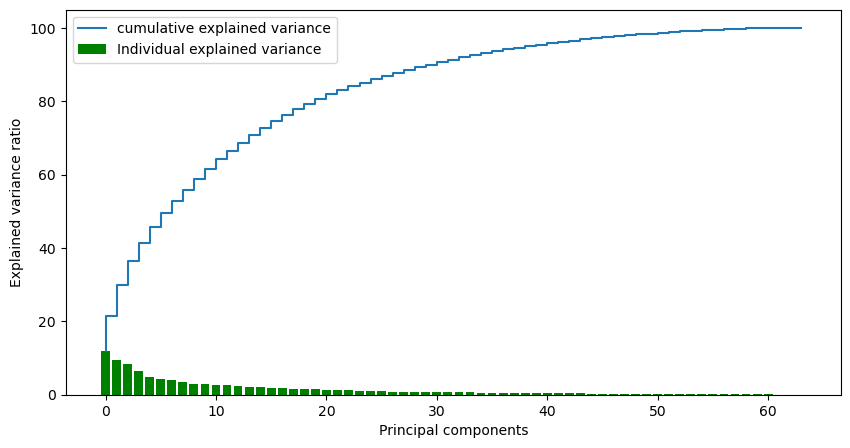

In [53]:
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)),var_exp,label='Individual explained variance',color='g')
plt.step(range(len(cum_var_exp)),cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()


In [57]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,train_size=0.8)

In [58]:
x_train.shape

(1437, 64)

In [59]:
x_test.shape

(360, 64)

In [62]:
pca=PCA(n_components=20)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)

In [72]:
pca_x_train.shape

(1437, 20)

In [73]:
pca_x_test.shape

(360, 20)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [67]:
dt=DecisionTreeClassifier().fit(pca_x_train,y_train)

In [68]:
predicted=dt.predict(pca_x_test)

In [69]:
predicted

array([1, 8, 0, 0, 7, 4, 2, 3, 8, 0, 9, 6, 0, 1, 7, 2, 9, 3, 8, 3, 2, 4,
       9, 4, 5, 6, 0, 7, 0, 1, 9, 1, 0, 9, 1, 4, 1, 8, 0, 0, 6, 5, 8, 5,
       5, 5, 7, 5, 7, 6, 3, 2, 3, 0, 0, 7, 8, 0, 7, 4, 9, 4, 0, 5, 8, 2,
       2, 2, 7, 6, 6, 4, 0, 3, 0, 1, 1, 4, 0, 3, 2, 2, 8, 7, 0, 9, 5, 5,
       7, 9, 5, 1, 1, 0, 6, 5, 7, 7, 5, 8, 5, 9, 5, 2, 4, 2, 4, 1, 8, 6,
       5, 4, 7, 3, 3, 1, 4, 6, 7, 3, 1, 1, 9, 8, 8, 4, 0, 9, 3, 5, 6, 6,
       7, 7, 3, 2, 1, 4, 7, 8, 3, 3, 4, 9, 7, 0, 3, 7, 3, 5, 8, 4, 1, 8,
       8, 1, 0, 8, 5, 6, 7, 6, 2, 0, 8, 5, 9, 5, 3, 0, 4, 5, 0, 9, 7, 8,
       6, 1, 7, 7, 6, 8, 8, 6, 9, 4, 4, 5, 8, 2, 2, 4, 4, 9, 3, 5, 5, 7,
       9, 2, 8, 5, 6, 3, 9, 8, 9, 2, 5, 1, 0, 2, 8, 5, 0, 9, 7, 9, 0, 7,
       5, 2, 0, 0, 0, 3, 6, 7, 1, 3, 4, 9, 5, 2, 7, 0, 7, 8, 0, 8, 5, 0,
       9, 4, 0, 9, 9, 1, 6, 6, 0, 9, 8, 5, 5, 6, 1, 4, 0, 2, 1, 3, 6, 9,
       0, 4, 4, 8, 8, 8, 3, 3, 9, 7, 5, 3, 8, 2, 4, 6, 5, 9, 6, 9, 7, 6,
       6, 3, 6, 3, 8, 7, 2, 1, 2, 1, 4, 7, 1, 2, 6,

In [71]:
confusion_matrix(predicted,y_test)

array([[35,  0,  0,  0,  0,  1,  0,  0,  1,  1],
       [ 0, 30,  2,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  1, 27,  2,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  1, 25,  0,  1,  0,  1,  2,  4],
       [ 1,  0,  1,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  2, 37,  1,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  1,  1,  1,  0,  1,  0,  0, 30,  3],
       [ 0,  3,  0,  3,  1,  3,  1,  1,  1, 24]], dtype=int64)

In [74]:
accuracy_score(predicted,y_test)

0.8527777777777777

In [75]:
predicted

array([1, 8, 0, 0, 7, 4, 2, 3, 8, 0, 9, 6, 0, 1, 7, 2, 9, 3, 8, 3, 2, 4,
       9, 4, 5, 6, 0, 7, 0, 1, 9, 1, 0, 9, 1, 4, 1, 8, 0, 0, 6, 5, 8, 5,
       5, 5, 7, 5, 7, 6, 3, 2, 3, 0, 0, 7, 8, 0, 7, 4, 9, 4, 0, 5, 8, 2,
       2, 2, 7, 6, 6, 4, 0, 3, 0, 1, 1, 4, 0, 3, 2, 2, 8, 7, 0, 9, 5, 5,
       7, 9, 5, 1, 1, 0, 6, 5, 7, 7, 5, 8, 5, 9, 5, 2, 4, 2, 4, 1, 8, 6,
       5, 4, 7, 3, 3, 1, 4, 6, 7, 3, 1, 1, 9, 8, 8, 4, 0, 9, 3, 5, 6, 6,
       7, 7, 3, 2, 1, 4, 7, 8, 3, 3, 4, 9, 7, 0, 3, 7, 3, 5, 8, 4, 1, 8,
       8, 1, 0, 8, 5, 6, 7, 6, 2, 0, 8, 5, 9, 5, 3, 0, 4, 5, 0, 9, 7, 8,
       6, 1, 7, 7, 6, 8, 8, 6, 9, 4, 4, 5, 8, 2, 2, 4, 4, 9, 3, 5, 5, 7,
       9, 2, 8, 5, 6, 3, 9, 8, 9, 2, 5, 1, 0, 2, 8, 5, 0, 9, 7, 9, 0, 7,
       5, 2, 0, 0, 0, 3, 6, 7, 1, 3, 4, 9, 5, 2, 7, 0, 7, 8, 0, 8, 5, 0,
       9, 4, 0, 9, 9, 1, 6, 6, 0, 9, 8, 5, 5, 6, 1, 4, 0, 2, 1, 3, 6, 9,
       0, 4, 4, 8, 8, 8, 3, 3, 9, 7, 5, 3, 8, 2, 4, 6, 5, 9, 6, 9, 7, 6,
       6, 3, 6, 3, 8, 7, 2, 1, 2, 1, 4, 7, 1, 2, 6,

In [76]:
y_test

array([1, 5, 0, 0, 7, 2, 2, 8, 8, 0, 9, 6, 0, 1, 7, 2, 4, 9, 8, 3, 2, 4,
       9, 4, 5, 6, 0, 7, 0, 1, 9, 1, 0, 9, 1, 4, 1, 8, 0, 0, 9, 5, 8, 4,
       5, 5, 7, 5, 7, 6, 3, 2, 3, 0, 0, 7, 8, 0, 7, 4, 9, 4, 0, 5, 8, 2,
       2, 2, 7, 6, 6, 4, 0, 3, 0, 1, 1, 4, 0, 3, 1, 2, 8, 7, 0, 9, 5, 5,
       7, 9, 6, 1, 1, 0, 6, 5, 7, 7, 5, 8, 5, 9, 5, 2, 4, 2, 4, 1, 8, 6,
       5, 4, 7, 3, 3, 1, 4, 6, 7, 8, 1, 2, 6, 9, 8, 4, 0, 9, 3, 5, 6, 6,
       7, 7, 3, 2, 1, 4, 7, 8, 3, 1, 0, 9, 7, 0, 2, 7, 3, 5, 8, 4, 9, 8,
       2, 1, 0, 8, 9, 6, 7, 6, 2, 5, 8, 5, 1, 5, 3, 0, 4, 3, 0, 9, 7, 8,
       6, 1, 7, 2, 6, 8, 8, 6, 9, 4, 4, 5, 8, 2, 2, 4, 4, 9, 9, 5, 5, 7,
       9, 2, 8, 5, 6, 9, 5, 8, 9, 3, 5, 1, 9, 2, 8, 5, 0, 3, 7, 1, 0, 7,
       5, 3, 0, 8, 0, 3, 6, 7, 1, 3, 4, 9, 5, 2, 7, 0, 7, 8, 0, 8, 5, 0,
       9, 4, 0, 3, 9, 1, 6, 6, 0, 5, 8, 5, 5, 6, 1, 4, 0, 2, 1, 3, 6, 9,
       0, 4, 4, 9, 8, 8, 3, 3, 1, 7, 5, 3, 8, 2, 4, 6, 5, 5, 6, 9, 7, 6,
       6, 3, 6, 3, 3, 9, 2, 1, 2, 1, 4, 7, 9, 2, 6,

In [77]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification

In [78]:
misclassification=get_misclassified_index(predicted,y_test)

In [79]:
len(misclassification)

53

In [80]:
misclassification[0:5]

[1, 5, 7, 16, 17]

In [88]:
def plot_misclassification(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong],(5,4)),cmap=plt.cm.gray)
        plt.title('predicted:{}Actual:{}'.format(predicted[wrong],y_test[wrong]))  

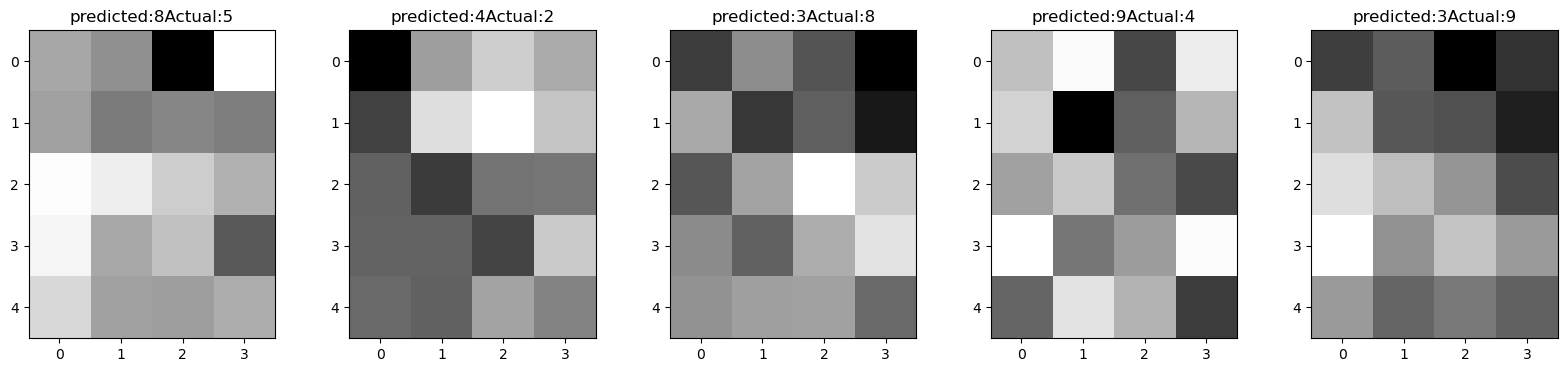

In [89]:
plot_misclassification(misclassification)